# Comparing M Dwarfs Results from ASPCAP and BossNet

## Learning Goals
By the end of this tutorial, you will:
- Load data from an _astra_ data product
- Identify specific stars within an _astra_ data product
- Cross-match stellar parameters between two different _astra_ data products
- Plot stellar parameters from an _astra_ data product

## Introduction
SDSS V provides stellar parameters through various data analysis pipelines, where each of these pipelines is run through the data analysis frameword for SDSS-V called [_astra_](https://sdss-astra.readthedocs.io/en/latest/). These various pipelines are typically suited for specific regions of stellar parameter space depending on how the pipeline was constructed.

In this short tutorial we will investigate how some of these pipelines perform for low-mass M dwarfs. We will demonsrate how these low-mass stars can be identified with the _astra_ data products and how the metallicities from two different pipelines compare.

## Imports
This tutorial requires three commonly used python packages, and an SDSS specific package
- _numpy_ for doing large array operations
- _matplotlib_ for plotting
- _astropy_ for reading fits table

Missing packages can be installed via `pip install numpy matplotlib astropy`

In [1]:
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams.update({'figure.facecolor': 'white',
                      'savefig.facecolor': 'white',
                      'font.size': 24,
                      'xtick.labelsize': 24,
                      'ytick.labelsize': 24,
                      'errorbar.capsize': 2})

## Loading data from a fits file

First, let us open the astraAllStarMDwarfType file from the SAS. This is a pipeline that uses empirical templates of M dwarfs to classify stars by spectral type and metallicity class.

**Where**: you can download the data --> [https://dr19.sdss.org/sas/dr19/spectro/astra/0.6.0/summary/astraAllStarMDwarfType-0.6.0.fits.gz](https://dr19.sdss.org/sas/dr19/spectro/astra/0.6.0/summary/astraAllStarMDwarfType-0.6.0.fits.gz)

**OR** if you are running this notebook on sciServer, the notebook is available at /home/idies/workspace/sdss_sas_ipl/ipl-3/spectro/astra/0.6.0/summary/

Below, the default loadpath is set to sciServer. If you download it locally, change loadpath as needed, e.g. "/Users/myuser/Downloads/"

Next, we'll use `astropy.fits` to load the file and choose the extension we want. In this case, MDwarfType is only run on BOSS data, which is in extension 1.

In [2]:
MDwarfType = Table.read('/home/idies/workspace/sdss_sas_ipl/ipl-3/spectro/astra/0.6.0/summary/astraAllStarMDwarfType-0.6.0.fits.gz', format='fits', hdu=1)

## Identifying M Dwarfs

To identify M dwarfs, we will be using the results of the MDwarfType pipeline. MDwarfType uses empirical templates of M dwarfs to classify stars by spectral type and metallicity class. We should note that these values are not currently calibrated with physical $T_{eff}$ or [Fe/H] values, but will still help us classify these objects. 

Below is an example of the spectral types (`spectral_type`) and metalliciy classes (`sub_type`) from MDwarfType. Here we can see that the spectral types are stored as a string and the metallicity classes as an integer. Here the spectral types go from K to M and then the number increases with decreasing temperature. The metallicity class then increases with decreasing metallicity.

In [3]:
MDwarfType[['sdss_id', 'spectral_type', 'sub_type']]

sdss_id,spectral_type,sub_type
int64,bytes4,float32
75287391,K5.0,5.0
75253301,K5.0,5.0
75252282,K5.0,5.0
75252789,K5.0,5.0
75252981,K7.5,0.5
103676603,K5.0,5.0
96122687,K5.0,5.0
54952096,K5.0,5.0
75821346,K5.0,5.0


To visualize this, let's plot the spectral types from MDwarfType on a HR diagram. To make the plotting easier, we will convert this string into an integer.

/tmp/ipykernel_171/269758289.py:12: RuntimeWarning: invalid value encountered in log10
  MDwarfType['g_mag'] + 5 * np.log10(1e-3 * MDwarfType['plx']) + 5,
/tmp/ipykernel_171/269758289.py:17: RuntimeWarning: invalid value encountered in log10
  MDwarfType['g_mag'][ev] + 5 * np.log10(1e-3 * MDwarfType['plx'][ev]) + 5,


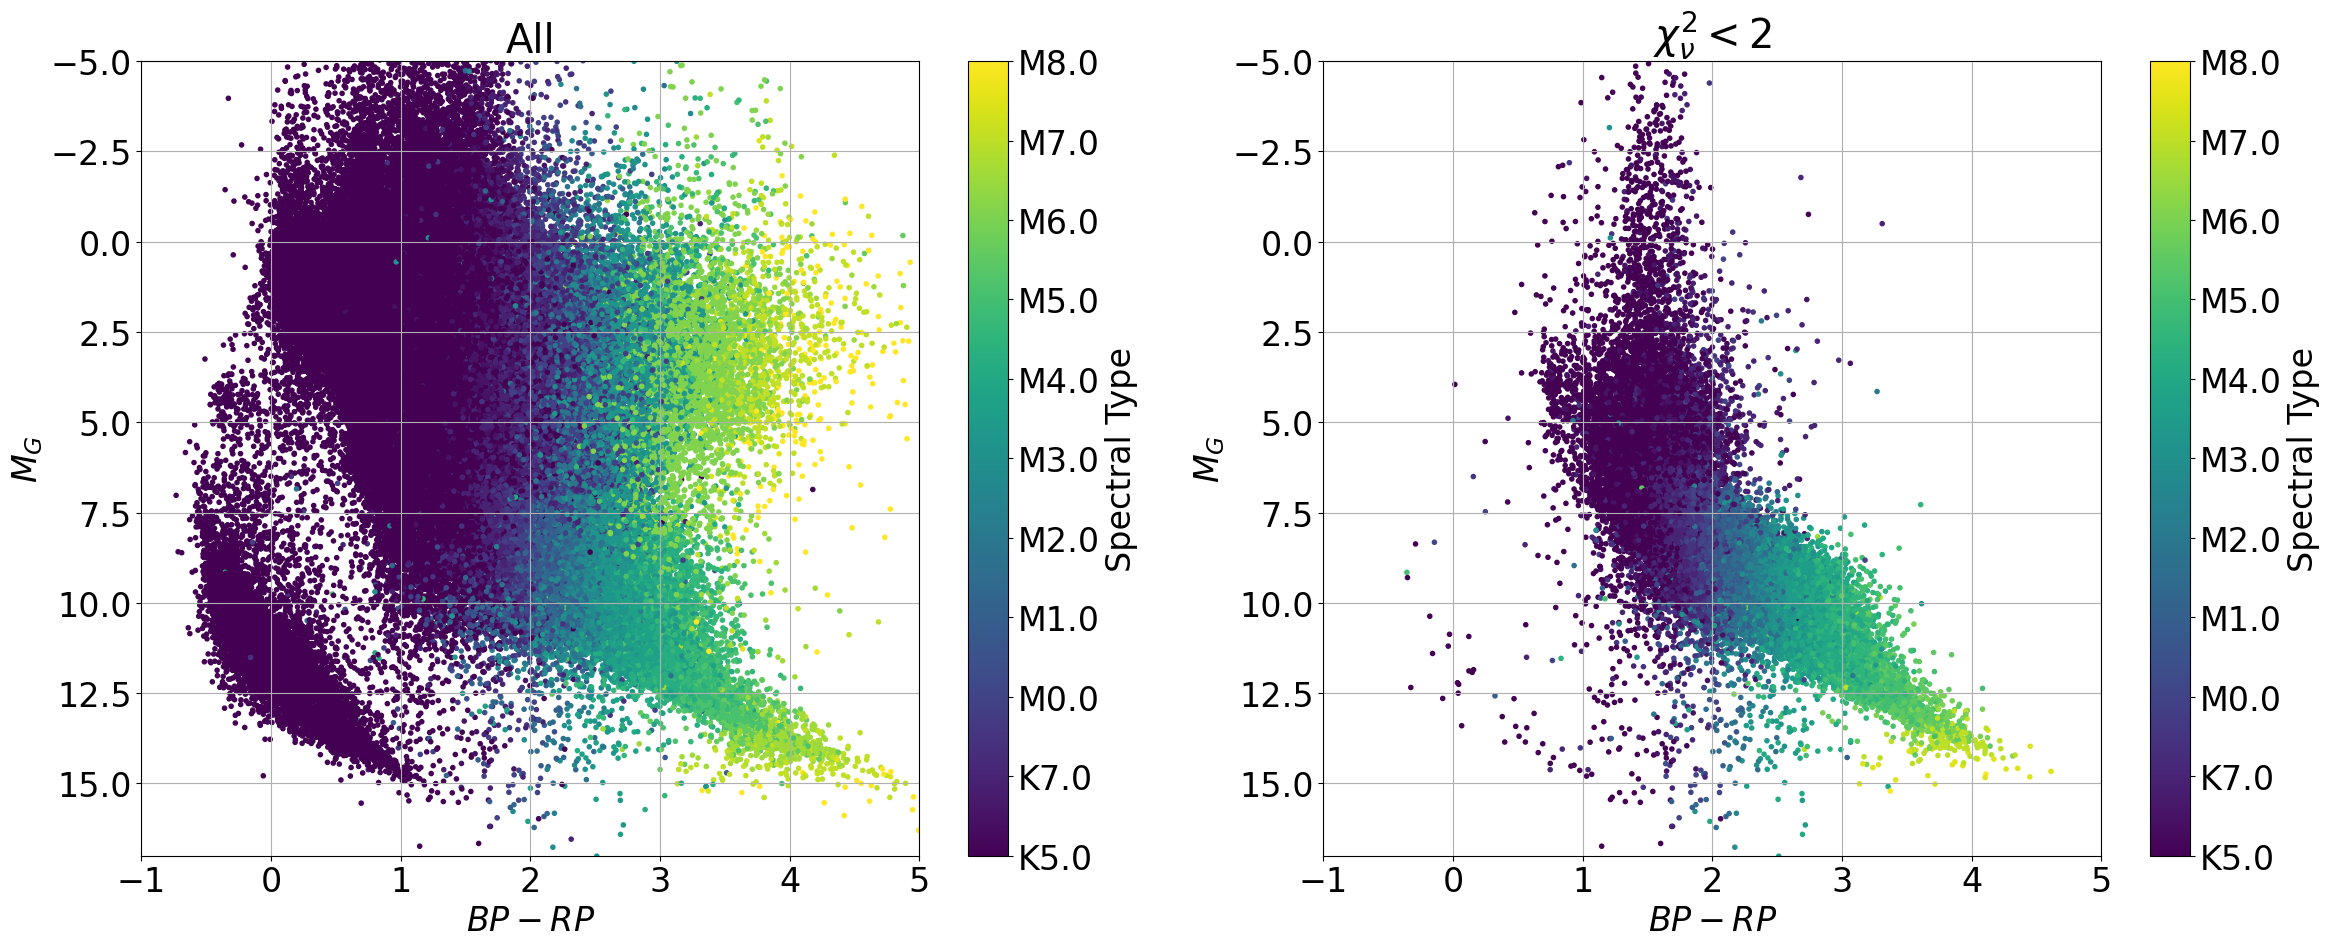

In [4]:
# create integer to spectral type
spectral_types = np.unique(MDwarfType['spectral_type'])
spectral_types = spectral_types[np.argsort(spectral_types)]
spectral_type_ints = np.arange(len(spectral_types))
MDwarfType['spectral_type_int'] = 9999
for st, sti in zip(spectral_types, spectral_type_ints):
    MDwarfType['spectral_type_int'][MDwarfType['spectral_type'] == st] = sti

# plot the spectral type results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
dens = ax1.scatter(MDwarfType['bp_mag'] - MDwarfType['rp_mag'],
                   MDwarfType['g_mag'] + 5 * np.log10(1e-3 * MDwarfType['plx']) + 5,
                   c=MDwarfType['spectral_type_int'], marker='.')

ev = MDwarfType['rchi2'] < 2
dens = ax2.scatter(MDwarfType['bp_mag'][ev] - MDwarfType['rp_mag'][ev],
                   MDwarfType['g_mag'][ev] + 5 * np.log10(1e-3 * MDwarfType['plx'][ev]) + 5,
                   c=MDwarfType['spectral_type_int'][ev], marker='.')
for ax in [ax1, ax2]:
    cb = plt.colorbar(dens, ax=ax, label='Spectral Type', ticks=spectral_type_ints[::2])
    cb.set_ticklabels(spectral_types[::2])
    ax.set_xlim((-1, 5))
    ax.set_ylim((-5, 17))
    ax.set_xlabel(r'$BP - RP$')
    ax.set_ylabel(r'$M_G$')
    ax.invert_yaxis()
    ax.grid()
ax1.set_title('All')
ax2.set_title(r'$\chi_\nu^2 < 2$')
plt.tight_layout()
plt.show()

From the above we can see two things. First, all of the non-M dwarfs are classified as K dwarfs, so removing these should remove all non-M dwarfs. Additionally, by applying a $\chi_\nu^2 < 2$ cut, we can remove most of the giants that are classified as M dwarfs from the sample. We will use these cuts to select the M dwarfs in the following _astra_ data products.

## Selecting M dwarfs with ASPCAP parameters

Now, using the list of M dwarfs from the MDwarfType pipeline, let's select all of the M dwarfs with stellar parameter from ASPCAP. The easiest way to do this is with sdss_id. sdss_id is described in detail [here](https://testng.sdss.org/dr19/targeting/sdss_id/), but in summary sdss_id provides a unique identifer across all targeting interations for SDSS-V.

Below, we will load the ASPCAP results and find the subset of M dwarfs within these results based on the cuts above. As ASPCAP is run on APOGEE spectra, we will be using the second extension for this data product.

In [5]:
# load ASPCAP data
ASPCAP =  Table.read('/home/idies/workspace/sdss_sas_ipl/ipl-3/spectro/astra/0.6.0/summary/astraAllStarASPCAP-0.6.0.fits.gz', format='fits', hdu=2)

# identify M dwarfs
ev_M = (MDwarfType['spectral_type'] >= 'M0.0') & (MDwarfType['rchi2'] < 2)

# join on sdss_id
ASPCAP_M_dwarfs = join(ASPCAP, MDwarfType[['sdss_id', 'spectral_type',
                                           'sub_type', 'rchi2', 'spectral_type_int']][ev_M],
                       keys='sdss_id')

## Comparing M dwarfs Stellar Paramaters in ASPCAP and BossNet

Now that we have identified the M dwarfs in ASPCAP, let us compare how these results to another _astra_ data product. Here we will look at the results from BossNet, which is a neural network approach to estimating stellar parameters from BOSS spectra. First, let us load the data and join it to ASPCAP on sdss_id.

In [6]:
BossNet =  Table.read('/home/idies/workspace/sdss_sas_ipl/ipl-3/spectro/astra/0.6.0/summary/astraAllVisitBossNet-0.6.0.fits.gz', format='fits', hdu=1)

BNet_ASPCAP_M_dwarfs = join(ASPCAP_M_dwarfs, BossNet, keys='sdss_id',
                            table_names=['aspcap', 'bnet'])

Now that these tables are joined, we can compare the metallicities of the two pipelines for the M dwarfs! The way the joining works, the columns in common have been renamed such that they are either appened with _aspcap or _bnet.

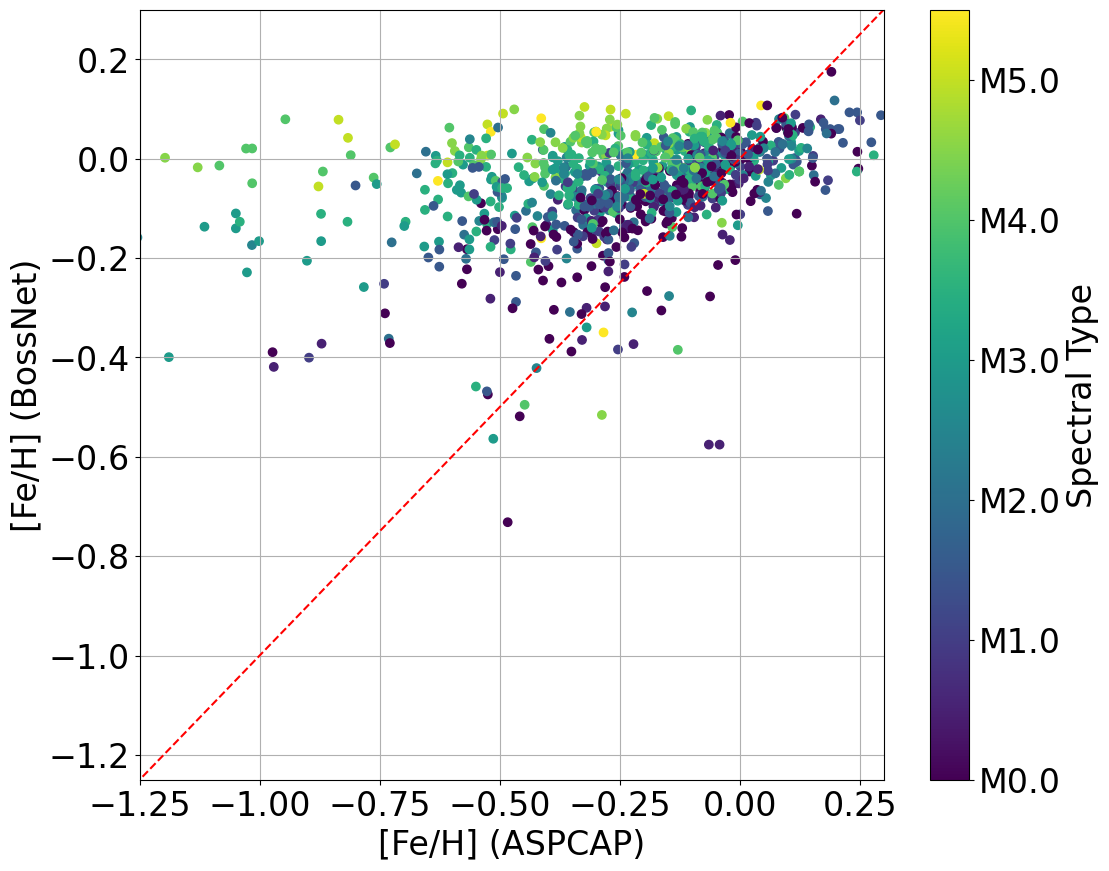

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(BNet_ASPCAP_M_dwarfs['fe_h_aspcap'],
            BNet_ASPCAP_M_dwarfs['fe_h_bnet'],
            c=BNet_ASPCAP_M_dwarfs['spectral_type_int'],
            vmin=4, vmax=15)
cb = plt.colorbar(label='Spectral Type', ticks=spectral_type_ints[4:16][::2])
cb.set_ticklabels(spectral_types[4:16][::2])
plt.plot([-1.5, 0.3], [-1.5, 0.3], '--', c='r')
plt.grid()
plt.xlabel('[Fe/H] (ASPCAP)')
plt.ylabel('[Fe/H] (BossNet)')
plt.xlim((-1.25, 0.3))
plt.ylim((-1.25, 0.3))
plt.show()

From this plot, we can see that the M dwarf metallicities are severly overestimated for BossNet compared to ASPCAP! Also, there seems to be a spectral type dependence for this where the issue is worse at lower temperatures. This makes sense as it has been noted that BossNet stellar parameters should not be trusted for lower temperature M dwarfs.

### About this notebook

This notebook was created to illustrate how to compare the results for M dwarfs in different _astra_ data products.

**Authors**: Ilija Medan

**Last Update**: 2024 December 10

If you use `astropy`  for published research, please cite the
authors. Follow this link for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

And of course please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data.